In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:48<00:00, 24.5MB/s]
100% 1.06G/1.06G [00:48<00:00, 23.4MB/s]


In [3]:
import zipfile

with zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r') as zip_ref:
    zip_ref.extractall('dogs-vs-cats-extracted')


In [4]:
import numpy as np
import tensorflow as tf
import pandas as pd
import keras
import matplotlib.pyplot as plt

In [5]:
train_data = tf.keras.utils.image_dataset_from_directory(
    directory = "/content/dogs-vs-cats-extracted/train",
    labels = "inferred",
    label_mode = "int",
    batch_size = 32,
    image_size = (256, 256)
)

Found 20000 files belonging to 2 classes.


In [6]:
test_data = tf.keras.utils.image_dataset_from_directory(
    directory = '/content/dogs-vs-cats-extracted/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)

Found 5000 files belonging to 2 classes.


In [8]:
test_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [9]:
def process(image, label):
  image = tf.cast(image/255. , tf.float32)
  return image, label

train_data = train_data.map(process)
test_data = test_data.map(process)

In [10]:
test_data

<_MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [21]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu',input_shape=(256,256,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [23]:
history = model.fit(train_data, epochs=5, validation_data=test_data)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 77ms/step - accuracy: 0.5434 - loss: 0.7899 - val_accuracy: 0.6340 - val_loss: 0.6557
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 77ms/step - accuracy: 0.6495 - loss: 0.6280 - val_accuracy: 0.7432 - val_loss: 0.5312
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 75ms/step - accuracy: 0.7494 - loss: 0.5179 - val_accuracy: 0.7470 - val_loss: 0.5296
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 81ms/step - accuracy: 0.8079 - loss: 0.4217 - val_accuracy: 0.7336 - val_loss: 0.5828
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 75ms/step - accuracy: 0.8870 - loss: 0.2796 - val_accuracy: 0.7454 - val_loss: 0.6347


In [24]:
dict_data = history.history

In [25]:
dict_data.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [26]:
accuracy = dict_data['accuracy']
val_accuracy = dict_data['val_accuracy']
loss = dict_data['loss']
val_loss = dict_data['val_loss']

In [27]:
import matplotlib.pyplot as plt

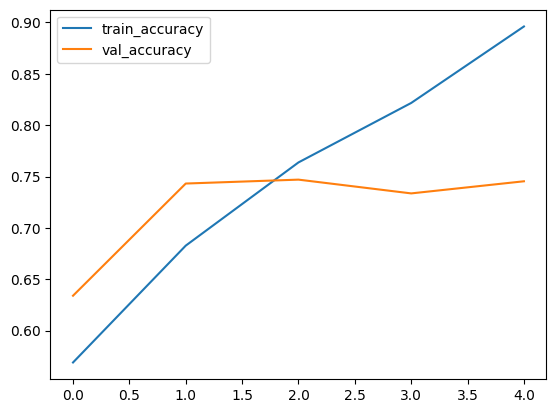

In [28]:
plt.plot(accuracy, label='train_accuracy')
plt.plot(val_accuracy, label='val_accuracy')
plt.legend()
plt.show()

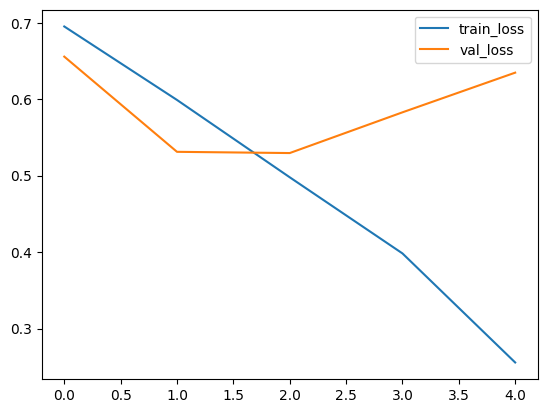

In [29]:
plt.plot(loss, label='train_loss')
plt.plot(val_loss, label='val_loss')
plt.legend()
plt.show()